<a href="https://colab.research.google.com/github/youssef13494/git_course/blob/main/PCA_on_Gray_Scale_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the required libraries

In [41]:
import numpy as np
import matplotlib.pyplot as plt

Load Gray Scale Image

In [42]:
image = plt.imread('/content/img/image.jpg')

Show shape of image

In [43]:
image.shape

(712, 900)

Convert image to 2D Matrix

In [45]:
image_matrix = np.array(image)

Compute mean of Matrix Values

In [46]:
mean=np.mean(image_matrix)

Standardized the Matrix

In [47]:
standardized_matrix = image_matrix-mean

Show Standardized Matrix Shape

In [68]:
standardized_matrix.shape

(712, 900)

Compute Covariance Matrix

In [49]:
cov_matrix = np.cov(standardized_matrix.T)

Show Covariance Matrix Shape

In [50]:
cov_matrix.shape

(900, 900)

Compute eigen Values and eigen Vectors

In [51]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
print(eigenvalues.shape)
print(eigenvectors.shape)

(900,)
(900, 900)


Sort eigen values and eigen vecors

In [52]:
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

Compute Variance threshold

In [109]:
compression_factor = 1
total_variance = np.sum(sorted_eigenvalues)
variance_threshold = total_variance * compression_factor

Compute Number of principle Components

In [110]:
cumulative_variance = np.cumsum(sorted_eigenvalues)
num_components = np.argmax(cumulative_variance > variance_threshold) + 1

Select eigen vectors that have comulative variance more than threshold

In [111]:
selected_eigenvectors = sorted_eigenvectors[:, :num_components]
selected_eigenvectors.shape

(900, 568)

Compressed Standardized Matrix

In [112]:
compressed_image = np.matmul(standardized_matrix, selected_eigenvectors)
compressed_image.shape

(712, 568)

Decompressed the Compressed image

In [113]:
Decompressed_image = np.matmul(compressed_image, selected_eigenvectors.T)+mean


Show Shape of Decompressed image

In [114]:
Decompressed_image.shape

(712, 900)

Visualize Original image and Decompressed image

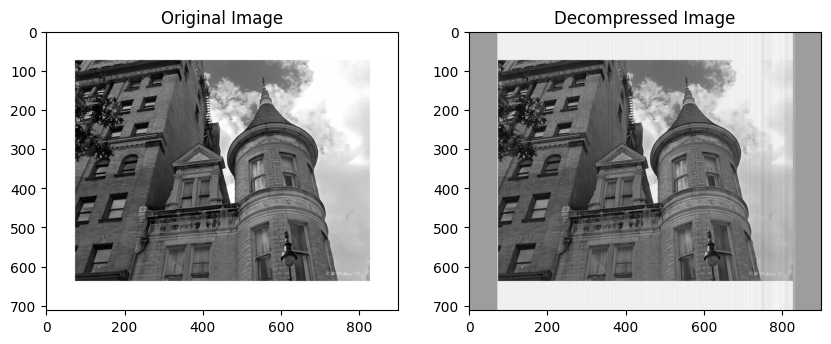

In [116]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_matrix, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(Decompressed_image, cmap='gray')
plt.title('Decompressed Image')
plt.show()